<a href="https://colab.research.google.com/github/Ajitesh-Gupta/TSA-LAB-1BM22AI162/blob/main/Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 7
i. Examine the Autocorrelation Function (ACF) and Partial
Autocorrelation Function (PACF) plots to determine the order of
the AR model.<br>
ii. Fit an AR(1) model to the dataset and evaluate its performance.<br>
iii. Explore the possibility of fitting higher lag AR models to
potentially capture more complex dependencies in the dataset.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data = df['Passengers']

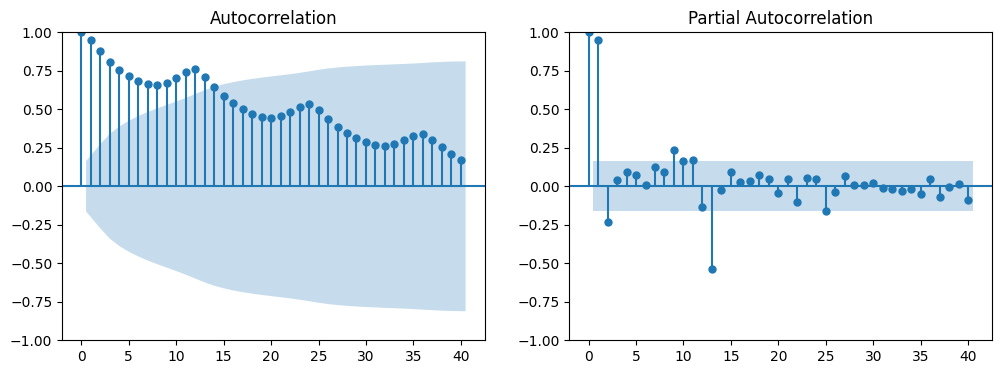

AR(1) AIC: 1078.0541689165111
AR(3) AIC: 1050.4728998359697


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will conta

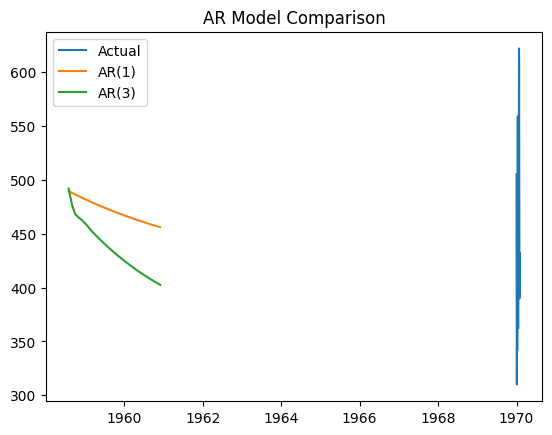

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg

train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Examine ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(data.dropna(), lags=40, ax=axes[0])
plot_pacf(data.dropna(), lags=40, ax=axes[1])
plt.show()

# PACF cuts off at lag p → AR(p) model

# ii. Fit AR(1) model
ar1_model = AutoReg(train, lags=1).fit()
ar1_pred = ar1_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(1) AIC: {ar1_model.aic}")

# iii. Fit higher lag AR models
ar3_model = AutoReg(train, lags=3).fit()
ar3_pred = ar3_model.predict(start=len(train), end=len(train)+len(test)-1)
print(f"AR(3) AIC: {ar3_model.aic}")

plt.plot(test.values, label='Actual')
plt.plot(ar1_pred, label='AR(1)')
plt.plot(ar3_pred, label='AR(3)')
plt.legend()
plt.title('AR Model Comparison')
plt.show()